In [1]:
import functions.hf_config as hf_config
from functions.adviser_tool import create_adviser_tool
from functions.loader import create_loader_tool
from functions.python_repl_tool import create_python_repl
from functions.utils import get_llm, get_prompt
from getpass import getpass

In [2]:
import os

In [3]:
LANGSMITH_TRACING="true"
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY="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"
LANGSMITH_PROJECT="ohw_llm"

In [4]:
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = LANGSMITH_API_KEY

In [5]:
hf_config.set_hf_token(getpass())

 ········


In [6]:
from functions.db_creation import create_db_examples

In [7]:
chroma = create_db_examples()

/home/jovyan/ohw25_proj_datadashboard_llm/final_notebooks/functions/db_creation.py:41: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vector_store_hf.persist()


In [8]:
advisor_tool = create_adviser_tool()

In [9]:
advisor_tool

StructuredTool(name='adviser_tool', description='Use this tool to find a suitable dataset and code example', args_schema=<class 'functions.adviser_tool.AdviserParams'>, func=<function description_reader at 0x7fd24ed460c0>)

In [10]:
loader_tool = create_loader_tool()

In [11]:
loader_tool

StructuredTool(name='load_climate_data', description='A general use function for downloading datasets from various sources on the internet. When choosing the variable, only use the variable name and nothing else.', args_schema=<class 'functions.loader.ClimateDataParams'>, func=<function load_climate_data at 0x7fd23f048360>)

In [12]:
repl_tool = create_python_repl()

In [13]:
repl_tool

Tool(name='python_repl', description='\n        You are a Python REPL specialized for scientific data analysis.\n    \n        You receive:\n        - Dataset information (including how to access it) from Tool 1.\n        - A file path to the downloaded dataset from Tool 2.\n        - Optionally, an example analysis function from Tool 1 that may be relevant to the query.\n        \n        Your job:\n        1. If an example function is provided and fits the user’s query, use it directly with the dataset.\n        2. If no suitable example function is provided, write your own analysis code using standard scientific Python packages such as:\n           - xarray (for handling datasets)\n           - matplotlib (for plotting, with clean labels and colorbars)\n           - numpy (for computations)\n           - cartopy or geopandas (if maps are needed)\n           - cmocean or matplotlib colormaps (for nice scientific colormaps)\n        3. Keep your code clean, minimal, and runnable in a 

In [14]:
tools = [
    advisor_tool,
    loader_tool,
    repl_tool
]

In [15]:
llm = get_llm()

In [16]:
from langchain.agents import AgentExecutor, create_tool_calling_agent

In [17]:
agent = create_tool_calling_agent(
    llm=llm,
    tools=tools,
    prompt=get_prompt(),
)

/home/.pixi/envs/default/lib/python3.12/site-packages/pydantic/json_schema.py:2191: PydanticJsonSchemaWarning: Default value (FieldInfo(annotation=NoneType, required=True, description='Available stores to read from.'),) is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)


In [18]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

/home/jovyan/ohw25_proj_datadashboard_llm/final_notebooks/functions/loader.py:254: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_dataset(


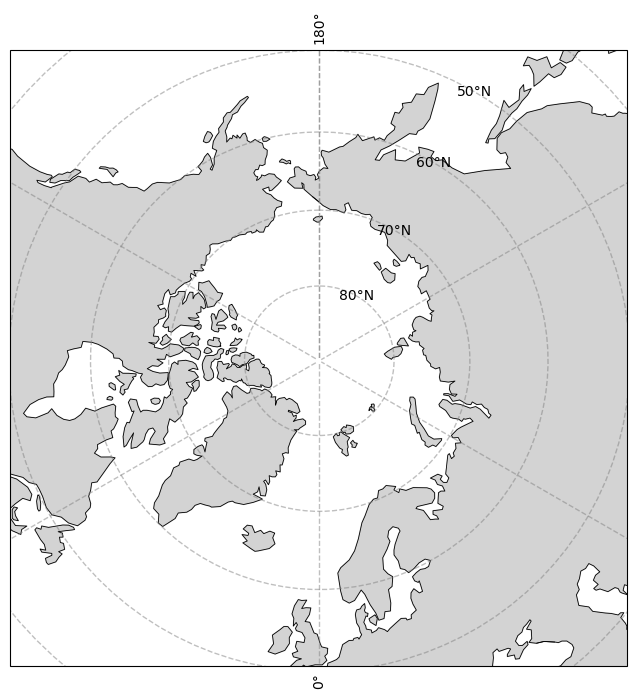

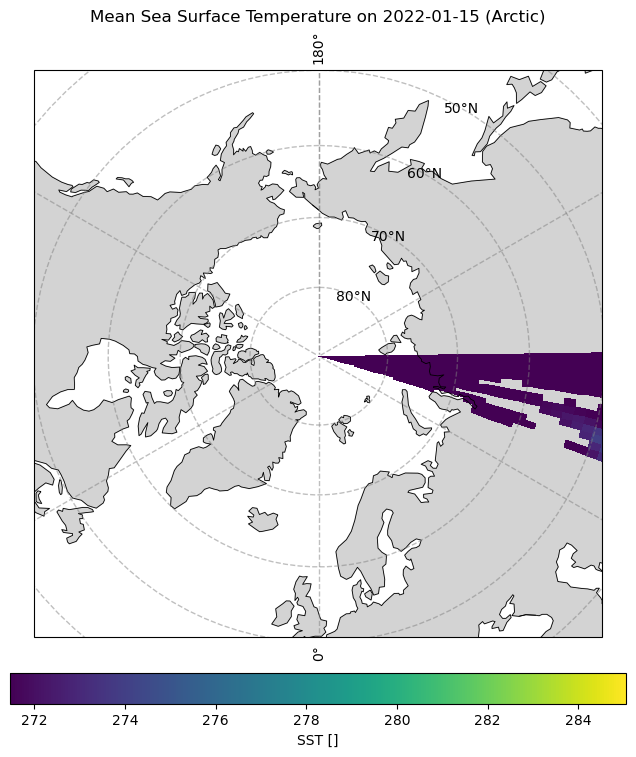

In [22]:
r = agent_executor.invoke({"input": "hello. plot ocean temperature for a day in arctic"})

#r = agent_executor.invoke({"input": "which dataset would you use to plot data from the indian ocean? if you find something, do 1 day"})